<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_FeatureImportanceShannonRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
#help(geometric_mean_score)

In [ ]:
import os
from os import path

import pandas as pd
import numpy as np

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
base_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"

assert path.exists(features_folder)

folders = os.listdir(features_folder)

folders

['1-covid', '2-other-viruses']

In [ ]:
case_study = path.join(features_folder, folders[0])

print(case_study,'\n')

files = os.listdir(case_study)

files

/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed/1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [ ]:
file = files[3]

print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))

print('Shape ', frame.shape)

frame.head()

loading data from... shannon-entropy-k12.csv
Shape  (1717, 14)


,nameseq,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,class
0,MN369046,1.947258,3.858477,5.760736,7.653392,9.525607,11.325758,12.884442,13.927217,14.440335,14.633892,14.696937,14.716328,0
1,MN306046,1.947011,3.858088,5.760560,7.653547,9.526318,11.327517,12.886543,13.930183,14.445938,14.641470,14.705093,14.724830,0
2,MF542265,1.946789,3.857781,5.759849,7.652205,9.524604,11.325808,12.885804,13.931567,14.447104,14.641521,14.705191,14.724444,0
3,KY983587,1.946912,3.857955,5.759917,7.651833,9.523715,11.323703,12.883437,13.930598,14.447270,14.641925,14.705766,14.724850,0
4,KY621348,1.947136,3.858235,5.760353,7.652140,9.523791,11.323748,12.882762,13.928372,14.444540,14.637878,14.701158,14.720012,0


In [ ]:
col = [f'k{i}' for i in range(1, 13)]
col.append('class')

# sns.pairplot(frame[col], hue='class')

In [ ]:
rows, columns = frame.shape

X = frame.iloc[:,1:(columns-1)]
y   = frame.iloc[:, -1]

labels = frame['class']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 12)
(516, 12)


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [ ]:
predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[1, 0])

array([[395,   0],
       [  0, 121]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0

In [ ]:
model.feature_importances_

array([0.07329869, 0.04110021, 0.08012748, 0.06160596, 0.10311533,
       0.03176553, 0.04957363, 0.08303127, 0.05552771, 0.1838724 ,
       0.14224645, 0.09473534])

In [ ]:
indices = np.argsort(model.feature_importances_)[::-1]

indices

array([ 9, 10,  4, 11,  7,  2,  0,  3,  8,  6,  1,  5])

In [ ]:
col = [f'k{i}' for i in range(1, 13)]

for i in range(X.shape[1]):
  print(i+1, col[indices[i]], indices[i], model.feature_importances_[indices[i]])

1 k10 9 0.18387240135673055
2 k11 10 0.14224645416252638
3 k5 4 0.10311533047773513
4 k12 11 0.09473533533005365
5 k8 7 0.08303127060839281
6 k3 2 0.08012748458626572
7 k1 0 0.07329869329293885
8 k4 3 0.06160595563048366
9 k9 8 0.055527707712612666
10 k7 6 0.04957362764870113
11 k2 1 0.04110020767084842
12 k6 5 0.0317655315227109


Text(0.5, 0, 'Features')

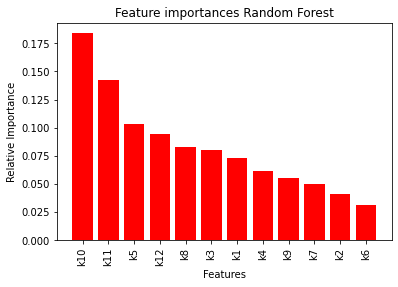

In [ ]:

plt.figure()

col_order = [col[i] for i in indices]

plt.title("Feature importances Random Forest")
plt.bar(range(X.shape[1]), model.feature_importances_[indices], color="r", align="center")
plt.xlim([-1, X.shape[1]])
plt.xticks(range(X.shape[1]), col_order, rotation='vertical')

plt.ylabel('Relative Importance')
plt.xlabel('Features')
# plt.show()

--- 

## Test with most importante features

In [ ]:
# selected_features = ['k10', 'k11', 'k5', 'k12', 'class']
# selected_features = ['k10', 'k11', 'k5', 'class']
selected_features = ['k10', 'k11', 'class']
# selected_features = ['k10', 'class']

# selected_features = ['k9', 'k8', 'class']

In [ ]:
print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))[selected_features]

print('Shape ', frame.shape)

frame.head()

loading data from... shannon-entropy-k12.csv
Shape  (1717, 3)


,k10,k11,class
0,14.633892,14.696937,0
1,14.641470,14.705093,0
2,14.641521,14.705191,0
3,14.641925,14.705766,0
4,14.637878,14.701158,0


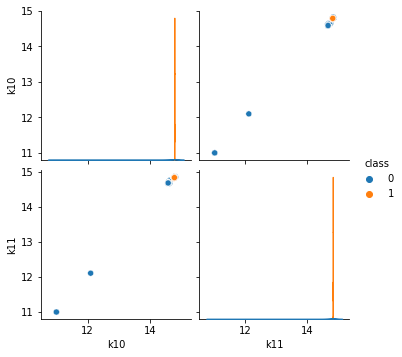

In [ ]:
sns.pairplot(frame, hue='class')

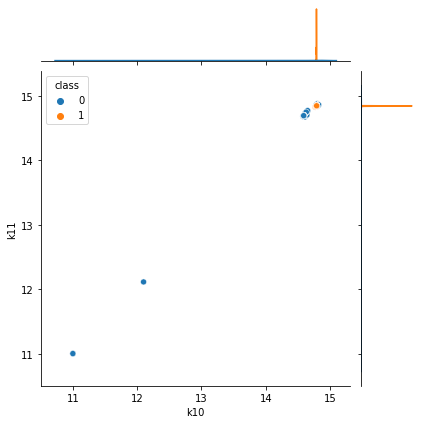

In [ ]:
g = sns.JointGrid(data=frame, x=selected_features[0], y=selected_features[1], hue='class')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [ ]:
rows, columns = frame.shape

X = frame.drop(labels=['class'], axis=1)
y   = frame['class']

labels = frame['class']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 2)
(516, 2)


In [ ]:
X.head()

,k10,k11
0,14.633892,14.696937
1,14.641470,14.705093
2,14.641521,14.705191
3,14.641925,14.705766
4,14.637878,14.701158


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[1, 0])

array([[395,   0],
       [  0, 121]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0